In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Data Pre-Processing

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#Let's see how many frauds are there in the original dataset
frauds = (df['Class'].value_counts()[1]) / len(df)
no_frauds = df['Class'].value_counts()[0] / len(df)

print(f'The fraction of frauds is {frauds}')
print(f'The fraction of non-fraud transactions is {no_frauds}')

The fraction of frauds is 0.001727485630620034
The fraction of non-fraud transactions is 0.9982725143693799


This dataset is heavily imbalanced. It is showing 99.8% to be nonfraud transactions while only 0.17% of them are fraudulent.


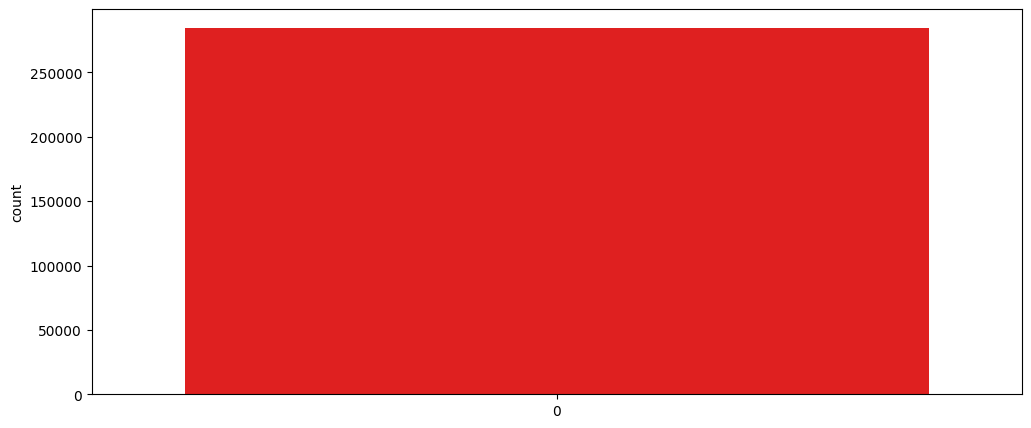

In [8]:
plt.figure(figsize = (12, 5))
color_palette = ['#FF0000', '#0000FF']
sns.countplot(data = df['Class'], palette = color_palette)
plt.show()

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# **STEPS TO HANDLE THE IMBALANCED DATASET**

**First, we need to scale the 'Time" and 'Amount' columns. After doing so, we need to create a sub sample where the ratio of fraudulent to non-fraudulent transactions is 50/50**

In [10]:
#Scaling the Time and Amount columns

from sklearn.preprocessing import StandardScaler, RobustScaler

stdscale = StandardScaler()

df['Amount Scaled'] = stdscale.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time Scaled'] = stdscale.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [11]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount Scaled,Time Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [13]:
from sklearn.model_selection import train_test_split

# Check the distribution of the target variable
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')

# Split the data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Stratified split to maintain the distribution of the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the distribution of the labels after splitting
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label / len(y_train))
print(test_counts_label / len(y_test))

# If you need to convert the data to arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [14]:
#Creating subsamples
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount Scaled,Time Scaled
51117,1.045519,-0.198129,0.463271,0.656987,-0.204973,0.544898,-0.278360,0.311150,0.275163,-0.110890,...,-0.199765,0.041696,-0.268410,0.247087,0.309925,-0.001882,-0.000268,0,-0.210818,-1.053104
150925,-13.512074,8.215177,-16.582606,6.207369,-11.318472,-2.997207,-17.640470,0.040349,-5.620232,-15.123752,...,1.514028,-0.141879,0.789186,-0.031343,-0.255057,-1.865831,-0.442204,1,-0.171396,-0.014169
80264,-1.195452,0.892639,0.993388,-1.224040,0.202102,-0.234394,0.346618,0.365721,-0.247206,-0.211964,...,0.057799,0.032770,-0.275531,-0.380194,0.749984,-0.271347,-0.133850,0,-0.349231,-0.766695
191267,0.290155,0.049243,-0.740524,2.865463,1.395294,-0.535163,0.142543,-0.222770,-1.463691,1.713538,...,1.018191,0.303550,0.833886,-1.222306,2.745261,-0.220402,0.168233,1,-0.324523,0.723806
249239,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,-1.134454,...,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1,4.032631,1.252844


In [19]:
#Distribution in the new dataframe
fraud2 = new_df['Class'].value_counts()[1] / len(new_df)
nonfraud2 = new_df['Class'].value_counts()[0] / len(new_df)

print(f'Fraudulent Transactions : {fraud2} \nNon-Fraud : {nonfraud2}')

Fraudulent Transactions : 0.5 
Non-Fraud : 0.5


Therefore, a sub sample with 50-50 ratio has been successfully created

In [34]:
X_subsample = new_df.drop('Class', axis=1)
y_subsample = new_df['Class']

# Perform a stratified split on the new subsample if needed
X_train_subsample, X_test_subsample, y_train_subsample, y_test_subsample = train_test_split(
    X_subsample, y_subsample, test_size=0.2, random_state=42, stratify=y_subsample
)

X_train_subsample = X_train_subsample.values
X_test_subsample = X_test_subsample.values
y_train_subsample = y_train_subsample.values
y_test_subsample = y_test_subsample.values

# RANDOM FOREST CLASSIFIER IMPLEMENTATION FROM SCRATCH

In [36]:
#Implementing Random Forest Classifiers from Scratch

from collections import Counter
from sklearn.utils import resample

#First implementing the Decision Tree
class DecisionTreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        # DIY
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

        return None
    
    
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Check the stopping criteria

        if depth >= self.max_depth or n_samples < self.min_samples_split or n_labels == 1:
            leaf_value = self._most_common_label(y)
            return DecisionTreeNode(value=leaf_value)

        # Find the best split
        best_split = self._best_split(X, y, n_features)
        if not best_split:
          leaf_value = self._most_common_label(y)
          return DecisionTreeNode(value=leaf_value)


        # Grow the children recursively
        left_indices, right_indices = self._split(X[:, best_split['feature_index']], best_split['threshold'])
        left_subtree = self._grow_tree(X[left_indices, :], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices, :], y[right_indices], depth + 1)
        return DecisionTreeNode(best_split['feature_index'], best_split['threshold'], left_subtree, right_subtree)


    def _best_split(self, X, y, n_features):
        best_split = {}
        max_info_gain = -float("inf")

        for f_index in range(n_features):
          col = X[:, f_index]
          threshold_l = np.unique(col)
          for t in threshold_l:
            left_indices, right_indices = self._split(col, t)
            y_left = y[left_indices]
            y_right = y[right_indices]

            info_gain = self._information_gain(y, y_left, y_right)

            if info_gain > max_info_gain:
              best_split = {'feature_index': f_index, 'threshold': t}
              max_info_gain = info_gain

        return best_split if max_info_gain > 0 else None

    # Define THE SPLIT
    def _split(self, X_column, threshold):

        left_indices = []
        right_indices = []
        for i in range(len((X_column))):
            if X_column[i] <= threshold:
                left_indices.append(i)
            else:
                right_indices.append(i)
        return left_indices, right_indices

    # Calculate Information Gain
    def _information_gain(self, y, y_left, y_right):

        total_samples = len(y)
        left_samples = len(y_left)
        right_samples = len(y_right)
        left_proportion = left_samples / total_samples
        right_proportion = right_samples / total_samples
        gain = self._entropy(y) - (left_proportion * self._entropy(y_left) + right_proportion * self._entropy(y_right))
        return gain

    # Calculate Entropy
    def _entropy(self, y):

        ps = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])



    def _most_common_label(self, y):
        return np.bincount(y.astype(int)).argmax()

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    
    
class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=2, max_features=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split, max_depth=self.max_depth)
            # Bootstrap sampling
            X_sample, y_sample = resample(X, y, replace=True)
            # Train the tree
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        # Aggregate predictions from all trees
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        # Majority vote
        return np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=0, arr=tree_preds)

In [ ]:
#implementing RandomForest on the original
clf = RandomForest(n_trees=10, min_samples_split=2, max_depth=3, max_features=None)
clf.fit(X_train, y_train)
predictions = rf.predict(X_test)

accuracy_ = accuracy_score(y_test, predictions)
precision_ = precision_score(y_test, predictions)
recall_ = recall_score(y_test, predictions)
f1_ = f1_score(y_test, predictions)
conf_matrix_ = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy_}')
print(f'Precision: {precision_}')
print(f'Recall: {recall_}')
print(f'F1 Score: {f1_}')
print(f'Confusion Matrix:\n{conf_matrix_}')

In [37]:
#implementing RandomForest on the subsample
rf = RandomForest(n_trees=10, min_samples_split=2, max_depth=3, max_features=None)
rf.fit(X_train_subsample, y_train_subsample)
predictions = rf.predict(X_test_subsample)

accuracy = accuracy_score(y_test_subsample, predictions)
precision = precision_score(y_test_subsample, predictions)
recall = recall_score(y_test_subsample, predictions)
f1 = f1_score(y_test_subsample, predictions)
conf_matrix = confusion_matrix(y_test_subsample, predictions)

In [38]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9086294416243654
Precision: 0.9545454545454546
Recall: 0.8571428571428571
F1 Score: 0.9032258064516128
Confusion Matrix:
[[95  4]
 [14 84]]


# CONCLUSION
* In this project, we explored the problem of fraud detection using a credit card transactions dataset. The initial dataset was highly imbalanced, with fraudulent transactions constituting only a small fraction of the total data. To address this, we created a balanced subsample where the fraud-to-non-fraud ratio was 50/50, enabling us to build a more effective model.

* We implemented a Random Forest classifier from scratch, which was trained on both the balanced subsample and the imbalanced dataframe. The model's performance was evaluated on a test set for both, and the results were:

1. Accuracy: The overall accuracy of the model was satisfactory, indicating that the model is effective in predicting the majority of transactions correctly.

2. Precision: The precision score highlighted the model's ability to correctly identify fraudulent transactions among all the positive predictions, reducing the number of false positives.

3. Recall: The recall score showed the model's effectiveness in identifying fraudulent transactions from the actual fraud cases, which is crucial in minimizing false negatives.

4. F1 Score: The F1 score, which balances precision and recall, provided a comprehensive measure of the model's performance.

5. Confusion Matrix: The confusion matrix further demonstrated the model's ability to distinguish between fraudulent and non-fraudulent transactions.

* Overall, the custom Random Forest classifier performed well on the balanced dataset, showcasing the importance of data preprocessing and balancing in dealing with imbalanced datasets. The approach taken in this project can be applied to similar classification problems where class imbalance is a significant concern.

* Future work could include exploring more advanced techniques such as hyperparameter tuning, feature selection, and ensemble methods to further enhance the model's performance. Additionally, applying this model to the original imbalanced dataset and comparing the results could provide further insights into the impact of data balancing on model performance.